# Health Insurance Premium Prediction Project

## Project Overview
This project aims to predict health insurance premiums using Ordinary Least Squares (OLS) regression with comprehensive feature engineering and selection techniques including:
- Variance Inflation Factor (VIF) analysis for multicollinearity detection
- Correlation analysis for feature selection
- Feature engineering to improve model performance

## Dataset
The dataset contains health insurance information with features like age, sex, BMI, children, smoker status, region, and insurance charges.

## Methodology
1. **Data Exploration and Preprocessing**
2. **Feature Engineering**
3. **Feature Selection using Correlation and VIF**
4. **OLS Model Implementation**
5. **Model Evaluation and Diagnostics**

In [1]:
# Import necessary libraries for data manipulation, visualization, and modeling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [2]:
# Load the insurance dataset
df = pd.read_csv('insurance.csv')

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())

Dataset Shape: (1338, 7)

First 5 rows:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None

Summary Statistics:
               

## Exploratory Data Analysis (EDA)

In [3]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# Check for duplicate records
print(f"\nNumber of duplicate records: {df.duplicated().sum()}")

# Display unique values for categorical columns
categorical_cols = ['sex', 'smoker', 'region']
for col in categorical_cols:
    print(f"\nUnique values in {col}: {df[col].unique()}")
    print(f"Value counts for {col}:")
    print(df[col].value_counts())

Missing values in each column:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Number of duplicate records: 1

Unique values in sex: ['female' 'male']
Value counts for sex:
sex
male      676
female    662
Name: count, dtype: int64

Unique values in smoker: ['yes' 'no']
Value counts for smoker:
smoker
no     1064
yes     274
Name: count, dtype: int64

Unique values in region: ['southwest' 'southeast' 'northwest' 'northeast']
Value counts for region:
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


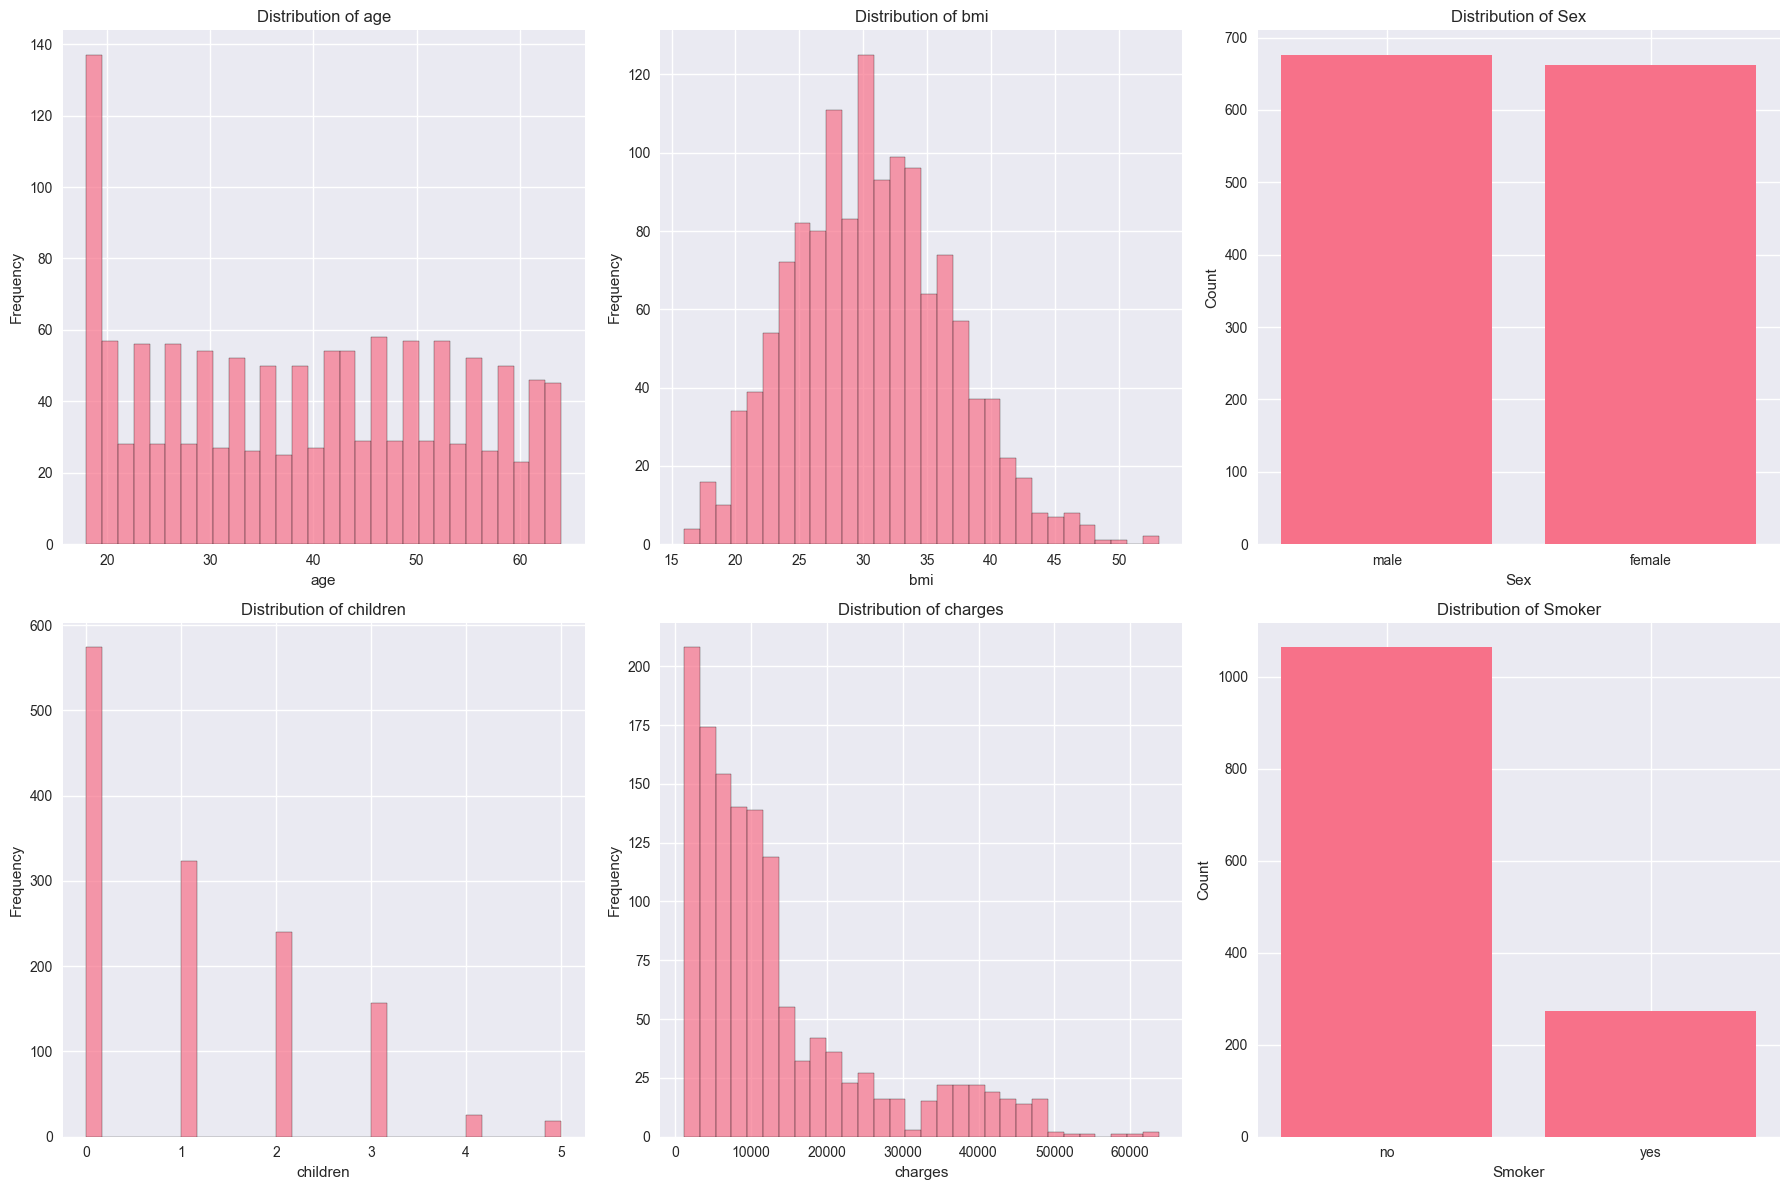

In [4]:
# Create visualizations for data distribution
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Distribution of numerical variables
numerical_cols = ['age', 'bmi', 'children', 'charges']
for i, col in enumerate(numerical_cols):
    row = i // 2
    col_idx = i % 2
    axes[row, col_idx].hist(df[col], bins=30, edgecolor='black', alpha=0.7)
    axes[row, col_idx].set_title(f'Distribution of {col}')
    axes[row, col_idx].set_xlabel(col)
    axes[row, col_idx].set_ylabel('Frequency')

# Bar plots for categorical variables
axes[0, 2].bar(df['sex'].value_counts().index, df['sex'].value_counts().values)
axes[0, 2].set_title('Distribution of Sex')
axes[0, 2].set_xlabel('Sex')
axes[0, 2].set_ylabel('Count')

axes[1, 2].bar(df['smoker'].value_counts().index, df['smoker'].value_counts().values)
axes[1, 2].set_title('Distribution of Smoker')
axes[1, 2].set_xlabel('Smoker')
axes[1, 2].set_ylabel('Count')

plt.tight_layout()
plt.show()

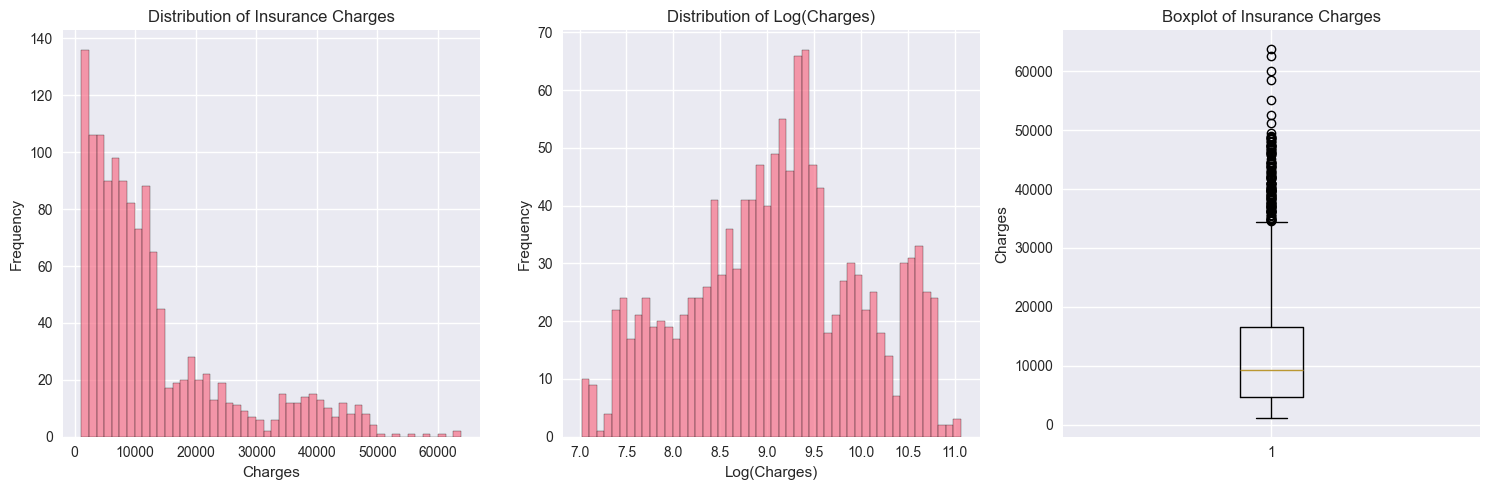

Statistical Summary of Insurance Charges:
Mean: $13270.42
Median: $9382.03
Standard Deviation: $12110.01
Minimum: $1121.87
Maximum: $63770.43
Skewness: 1.52
Kurtosis: 1.61


In [5]:
# Analyze the target variable (charges) in more detail
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(df['charges'], bins=50, edgecolor='black', alpha=0.7)
plt.title('Distribution of Insurance Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(np.log(df['charges']), bins=50, edgecolor='black', alpha=0.7)
plt.title('Distribution of Log(Charges)')
plt.xlabel('Log(Charges)')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.boxplot(df['charges'])
plt.title('Boxplot of Insurance Charges')
plt.ylabel('Charges')

plt.tight_layout()
plt.show()

# Statistical summary of charges
print("Statistical Summary of Insurance Charges:")
print(f"Mean: ${df['charges'].mean():.2f}")
print(f"Median: ${df['charges'].median():.2f}")
print(f"Standard Deviation: ${df['charges'].std():.2f}")
print(f"Minimum: ${df['charges'].min():.2f}")
print(f"Maximum: ${df['charges'].max():.2f}")
print(f"Skewness: {df['charges'].skew():.2f}")
print(f"Kurtosis: {df['charges'].kurtosis():.2f}")

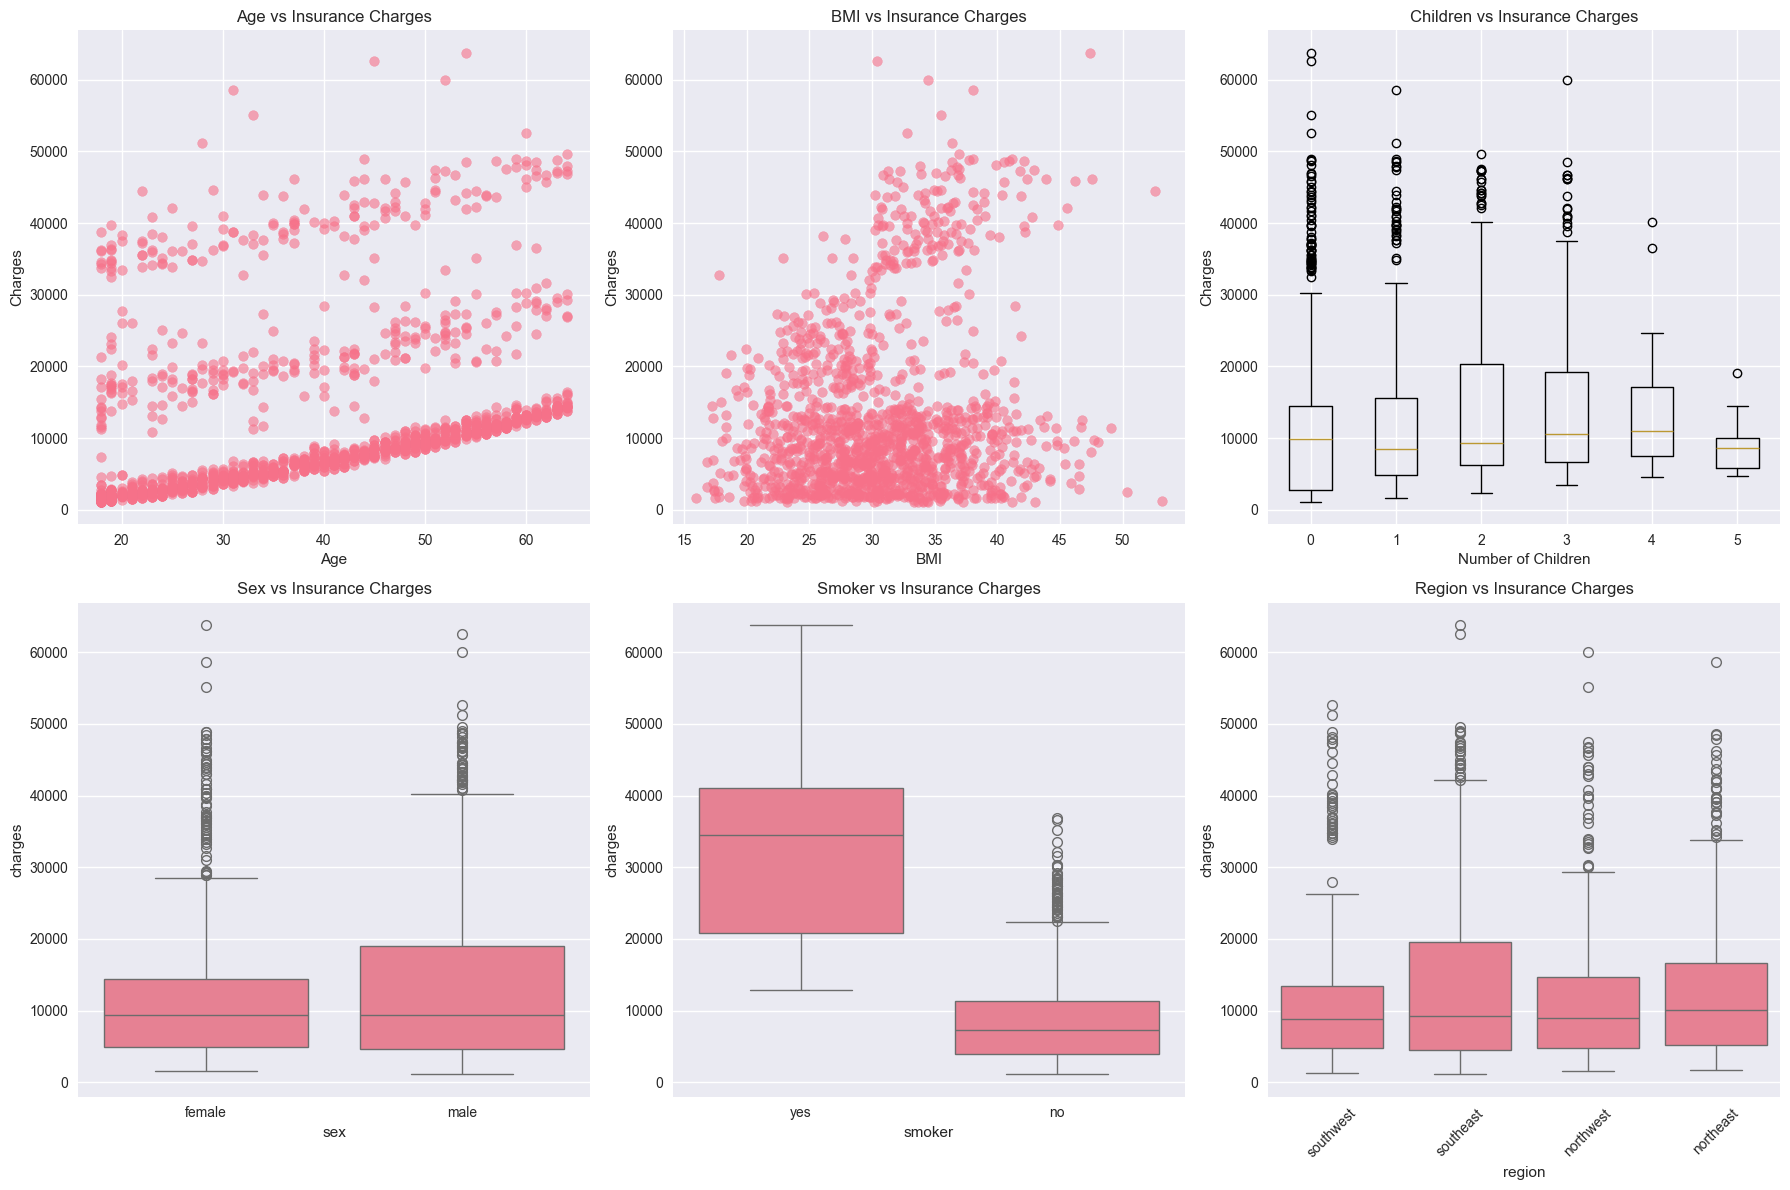

In [6]:
# Analyze relationships between features and target variable
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Age vs Charges
axes[0, 0].scatter(df['age'], df['charges'], alpha=0.6)
axes[0, 0].set_title('Age vs Insurance Charges')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Charges')

# BMI vs Charges
axes[0, 1].scatter(df['bmi'], df['charges'], alpha=0.6)
axes[0, 1].set_title('BMI vs Insurance Charges')
axes[0, 1].set_xlabel('BMI')
axes[0, 1].set_ylabel('Charges')

# Children vs Charges
axes[0, 2].boxplot([df[df['children'] == i]['charges'].values for i in range(6)], 
                   labels=range(6))
axes[0, 2].set_title('Children vs Insurance Charges')
axes[0, 2].set_xlabel('Number of Children')
axes[0, 2].set_ylabel('Charges')

# Sex vs Charges
sns.boxplot(data=df, x='sex', y='charges', ax=axes[1, 0])
axes[1, 0].set_title('Sex vs Insurance Charges')

# Smoker vs Charges
sns.boxplot(data=df, x='smoker', y='charges', ax=axes[1, 1])
axes[1, 1].set_title('Smoker vs Insurance Charges')

# Region vs Charges
sns.boxplot(data=df, x='region', y='charges', ax=axes[1, 2])
axes[1, 2].set_title('Region vs Insurance Charges')
axes[1, 2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## Feature Engineering

In [7]:
# Create a copy of the dataset for feature engineering
df_engineered = df.copy()

# 1. Create BMI categories
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif bmi < 25:
        return 'Normal'
    elif bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

df_engineered['bmi_category'] = df_engineered['bmi'].apply(categorize_bmi)

# 2. Create age groups
def categorize_age(age):
    if age < 25:
        return 'Young'
    elif age < 35:
        return 'Young Adult'
    elif age < 50:
        return 'Middle Age'
    else:
        return 'Senior'

df_engineered['age_group'] = df_engineered['age'].apply(categorize_age)

# 3. Create interaction features
df_engineered['age_bmi_interaction'] = df_engineered['age'] * df_engineered['bmi']
df_engineered['smoker_age_interaction'] = df_engineered['age'] * (df_engineered['smoker'] == 'yes').astype(int)
df_engineered['smoker_bmi_interaction'] = df_engineered['bmi'] * (df_engineered['smoker'] == 'yes').astype(int)

# 4. Create polynomial features
df_engineered['age_squared'] = df_engineered['age'] ** 2
df_engineered['bmi_squared'] = df_engineered['bmi'] ** 2

# 5. Create binary features for high-risk categories
df_engineered['high_bmi'] = (df_engineered['bmi'] >= 30).astype(int)
df_engineered['senior_citizen'] = (df_engineered['age'] >= 50).astype(int)

print("New features created:")
new_features = ['bmi_category', 'age_group', 'age_bmi_interaction', 'smoker_age_interaction', 
                'smoker_bmi_interaction', 'age_squared', 'bmi_squared', 'high_bmi', 'senior_citizen']
for feature in new_features:
    print(f"- {feature}")

print(f"\nDataset shape after feature engineering: {df_engineered.shape}")

New features created:
- bmi_category
- age_group
- age_bmi_interaction
- smoker_age_interaction
- smoker_bmi_interaction
- age_squared
- bmi_squared
- high_bmi
- senior_citizen

Dataset shape after feature engineering: (1338, 16)


In [8]:
# Encode categorical variables using Label Encoding and One-Hot Encoding
from sklearn.preprocessing import LabelEncoder

# Label encode binary categorical variables
le_sex = LabelEncoder()
le_smoker = LabelEncoder()

df_engineered['sex_encoded'] = le_sex.fit_transform(df_engineered['sex'])
df_engineered['smoker_encoded'] = le_smoker.fit_transform(df_engineered['smoker'])

# One-hot encode multi-class categorical variables
region_dummies = pd.get_dummies(df_engineered['region'], prefix='region')
bmi_category_dummies = pd.get_dummies(df_engineered['bmi_category'], prefix='bmi_cat')
age_group_dummies = pd.get_dummies(df_engineered['age_group'], prefix='age_grp')

# Combine all features
df_final = pd.concat([df_engineered, region_dummies, bmi_category_dummies, age_group_dummies], axis=1)

# Drop original categorical columns
columns_to_drop = ['sex', 'smoker', 'region', 'bmi_category', 'age_group']
df_final = df_final.drop(columns=columns_to_drop)

print("Categorical encoding completed!")
print(f"Final dataset shape: {df_final.shape}")
print("\nFinal features:")
print(df_final.columns.tolist())

Categorical encoding completed!
Final dataset shape: (1338, 25)

Final features:
['age', 'bmi', 'children', 'charges', 'age_bmi_interaction', 'smoker_age_interaction', 'smoker_bmi_interaction', 'age_squared', 'bmi_squared', 'high_bmi', 'senior_citizen', 'sex_encoded', 'smoker_encoded', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest', 'bmi_cat_Normal', 'bmi_cat_Obese', 'bmi_cat_Overweight', 'bmi_cat_Underweight', 'age_grp_Middle Age', 'age_grp_Senior', 'age_grp_Young', 'age_grp_Young Adult']


## Feature Selection using Correlation Analysis

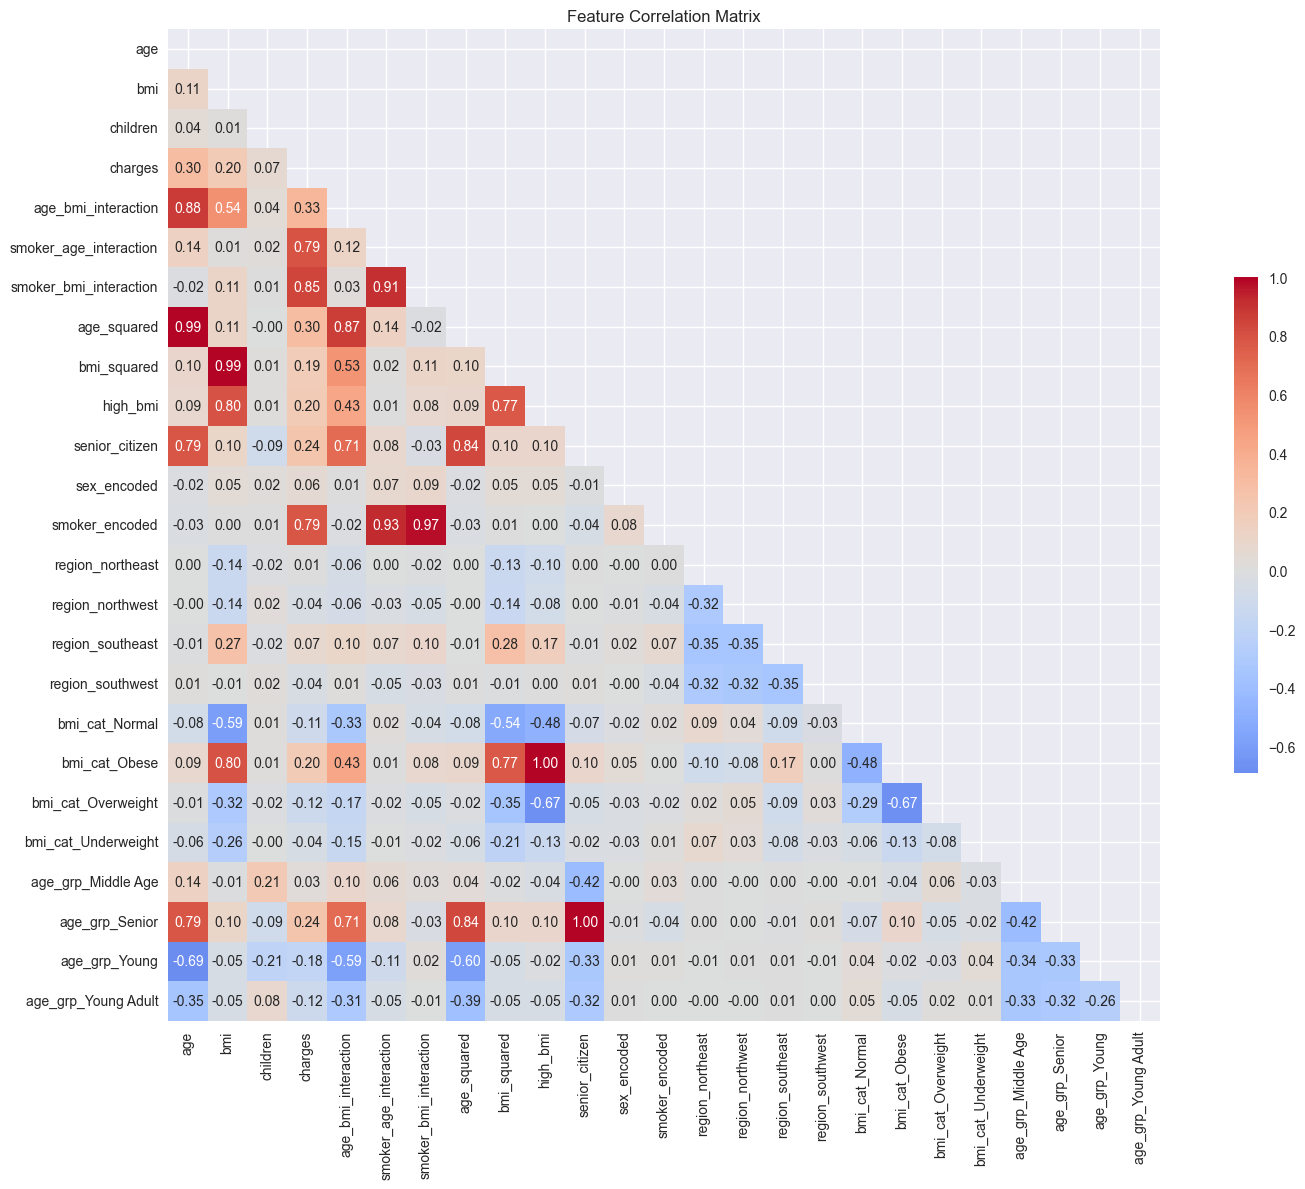

Highly correlated feature pairs (|correlation| > 0.8):
age - age_bmi_interaction: 0.880
age - age_squared: 0.988
bmi - bmi_squared: 0.991
charges - smoker_bmi_interaction: 0.845
age_bmi_interaction - age_squared: 0.874
smoker_age_interaction - smoker_bmi_interaction: 0.908
smoker_age_interaction - smoker_encoded: 0.927
smoker_bmi_interaction - smoker_encoded: 0.974
age_squared - senior_citizen: 0.840
age_squared - age_grp_Senior: 0.840
high_bmi - bmi_cat_Obese: 1.000
senior_citizen - age_grp_Senior: 1.000

Correlation with target variable (charges):
charges                   1.000000
smoker_bmi_interaction    0.845120
smoker_age_interaction    0.789253
smoker_encoded            0.787251
age_bmi_interaction       0.334754
age_squared               0.300772
age                       0.299008
senior_citizen            0.243211
age_grp_Senior            0.243211
bmi_cat_Obese             0.199532
high_bmi                  0.199532
bmi                       0.198341
bmi_squared             

In [9]:
# Calculate correlation matrix
correlation_matrix = df_final.corr()

# Create correlation heatmap
plt.figure(figsize=(16, 12))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.2f', cbar_kws={'shrink': 0.5}, mask=mask)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

# Identify highly correlated features (correlation > 0.8 or < -0.8)
def find_high_correlation_pairs(corr_matrix, threshold=0.8):
    high_corr_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))
    return high_corr_pairs

high_corr_pairs = find_high_correlation_pairs(correlation_matrix, threshold=0.8)
print("Highly correlated feature pairs (|correlation| > 0.8):")
for pair in high_corr_pairs:
    print(f"{pair[0]} - {pair[1]}: {pair[2]:.3f}")

# Correlation with target variable
target_correlation = correlation_matrix['charges'].sort_values(key=abs, ascending=False)
print("\nCorrelation with target variable (charges):")
print(target_correlation)

In [10]:
# Remove highly correlated features based on correlation analysis
# We'll remove one feature from each highly correlated pair, keeping the one more correlated with target

features_to_remove = set()

# Remove features with very low correlation with target (|correlation| < 0.05)
low_correlation_features = target_correlation[abs(target_correlation) < 0.05].index.tolist()
if 'charges' in low_correlation_features:
    low_correlation_features.remove('charges')

print("Features with low correlation to target (|correlation| < 0.05):")
print(low_correlation_features)

# For highly correlated pairs, remove the one with lower target correlation
for pair in high_corr_pairs:
    feature1, feature2 = pair[0], pair[1]
    if feature1 != 'charges' and feature2 != 'charges':
        corr1 = abs(target_correlation[feature1])
        corr2 = abs(target_correlation[feature2])
        if corr1 < corr2:
            features_to_remove.add(feature1)
        else:
            features_to_remove.add(feature2)

# Combine all features to remove
features_to_remove.update(low_correlation_features)
features_to_remove = list(features_to_remove)

print(f"\nFeatures to remove based on correlation analysis: {features_to_remove}")

# Create dataset after correlation-based feature removal
df_corr_selected = df_final.drop(columns=features_to_remove)
print(f"\nDataset shape after correlation-based selection: {df_corr_selected.shape}")
print("Remaining features:")
print([col for col in df_corr_selected.columns if col != 'charges'])

Features with low correlation to target (|correlation| < 0.05):
['bmi_cat_Underweight', 'region_southwest', 'region_northwest', 'age_grp_Middle Age', 'region_northeast']

Features to remove based on correlation analysis: ['region_northeast', 'senior_citizen', 'bmi_cat_Obese', 'age_grp_Middle Age', 'region_southwest', 'smoker_age_interaction', 'smoker_encoded', 'bmi_squared', 'region_northwest', 'bmi_cat_Underweight', 'age_grp_Senior', 'age', 'age_squared']

Dataset shape after correlation-based selection: (1338, 12)
Remaining features:
['bmi', 'children', 'age_bmi_interaction', 'smoker_bmi_interaction', 'high_bmi', 'sex_encoded', 'region_southeast', 'bmi_cat_Normal', 'bmi_cat_Overweight', 'age_grp_Young', 'age_grp_Young Adult']


## VIF Analysis and Multicollinearity Check

Data types in df_corr_selected:
bmi                       float64
children                    int64
charges                   float64
age_bmi_interaction       float64
smoker_bmi_interaction    float64
high_bmi                    int64
sex_encoded                 int64
region_southeast             bool
bmi_cat_Normal               bool
bmi_cat_Overweight           bool
age_grp_Young                bool
age_grp_Young Adult          bool
dtype: object

Shape: (1338, 12)

Columns: ['bmi', 'children', 'charges', 'age_bmi_interaction', 'smoker_bmi_interaction', 'high_bmi', 'sex_encoded', 'region_southeast', 'bmi_cat_Normal', 'bmi_cat_Overweight', 'age_grp_Young', 'age_grp_Young Adult']

First few rows:
      bmi  children      charges  age_bmi_interaction  smoker_bmi_interaction  \
0  27.900         0  16884.92400              530.100                    27.9   
1  33.770         1   1725.55230              607.860                     0.0   
2  33.000         3   4449.46200              924.

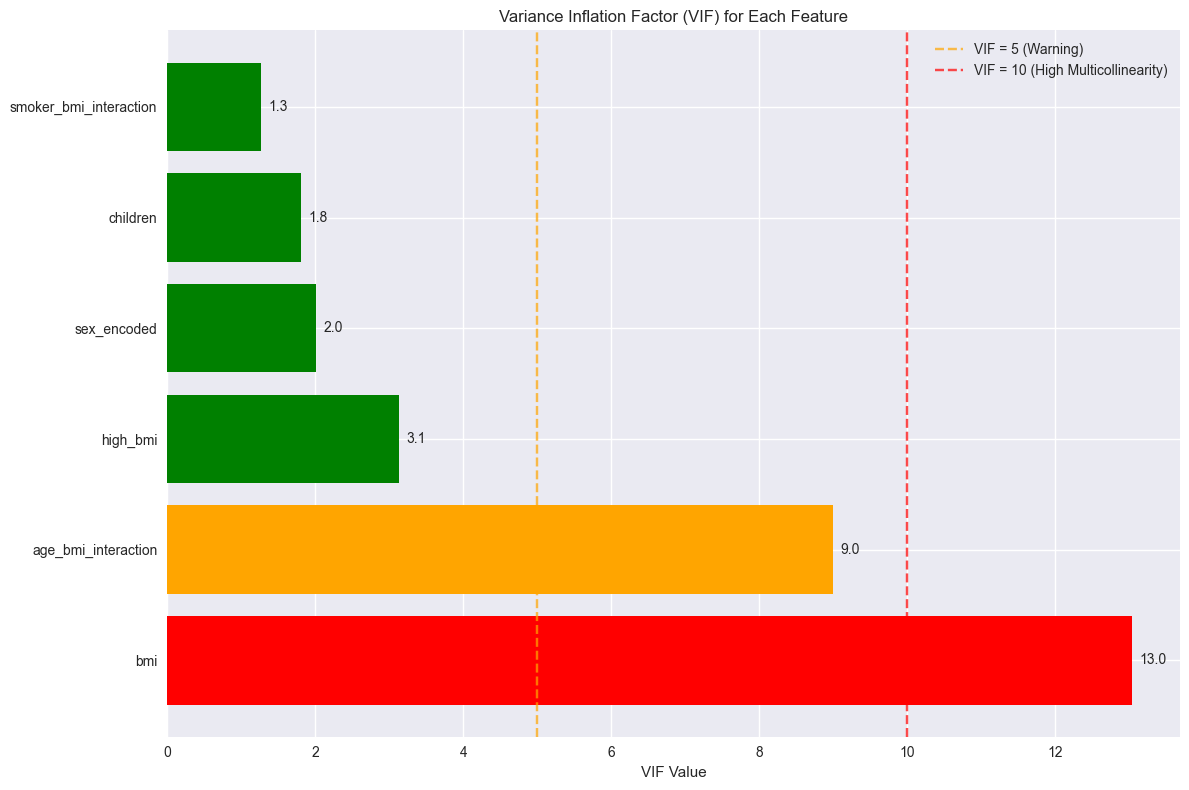


Features with high VIF (> 10): ['bmi']


In [13]:
# First, let's check the data types and any non-numeric columns in df_corr_selected
print("Data types in df_corr_selected:")
print(df_corr_selected.dtypes)
print("\nShape:", df_corr_selected.shape)
print("\nColumns:", df_corr_selected.columns.tolist())
print("\nFirst few rows:")
print(df_corr_selected.head())

# Check for any non-numeric columns
non_numeric_cols = df_corr_selected.select_dtypes(exclude=[np.number]).columns.tolist()
print(f"\nNon-numeric columns: {non_numeric_cols}")

# Calculate VIF (Variance Inflation Factor) for multicollinearity detection
def calculate_vif(df, target_col='charges'):
    """Calculate VIF for all features except target variable"""
    X = df.drop(columns=[target_col])
    
    # Ensure all columns are numeric
    X = X.select_dtypes(include=[np.number])
    
    if len(X.columns) == 0:
        print("No numeric columns found for VIF calculation")
        return pd.DataFrame()
    
    # Calculate VIF for each feature
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
    
    return vif_data.sort_values('VIF', ascending=False)

# Calculate VIF for correlation-selected features
print("\nVIF Analysis after correlation-based feature selection:")
vif_results = calculate_vif(df_corr_selected)
print(vif_results)

# Visualize VIF values only if we have results
if not vif_results.empty:
    plt.figure(figsize=(12, 8))
    colors = ['red' if vif > 10 else 'orange' if vif > 5 else 'green' for vif in vif_results['VIF']]
    bars = plt.barh(range(len(vif_results)), vif_results['VIF'], color=colors)
    plt.yticks(range(len(vif_results)), vif_results['Feature'])
    plt.xlabel('VIF Value')
    plt.title('Variance Inflation Factor (VIF) for Each Feature')
    plt.axvline(x=5, color='orange', linestyle='--', alpha=0.7, label='VIF = 5 (Warning)')
    plt.axvline(x=10, color='red', linestyle='--', alpha=0.7, label='VIF = 10 (High Multicollinearity)')
    plt.legend()

    # Add VIF values on bars
    for i, bar in enumerate(bars):
        plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2, 
                 f'{vif_results.iloc[i]["VIF"]:.1f}', va='center')

    plt.tight_layout()
    plt.show()

    # Identify features with high VIF (> 10)
    high_vif_features = vif_results[vif_results['VIF'] > 10]['Feature'].tolist()
    print(f"\nFeatures with high VIF (> 10): {high_vif_features}")
else:
    print("No VIF results to visualize")

In [14]:
# Remove features with high VIF iteratively
def remove_high_vif_features(df, target_col='charges', threshold=10):
    """Remove features with VIF > threshold iteratively"""
    df_vif = df.copy()
    removed_features = []
    
    while True:
        vif_data = calculate_vif(df_vif, target_col)
        max_vif = vif_data['VIF'].max()
        
        if max_vif <= threshold:
            break
            
        # Remove feature with highest VIF
        feature_to_remove = vif_data[vif_data['VIF'] == max_vif]['Feature'].iloc[0]
        removed_features.append(feature_to_remove)
        df_vif = df_vif.drop(columns=[feature_to_remove])
        
        print(f"Removed {feature_to_remove} (VIF: {max_vif:.2f})")
    
    return df_vif, removed_features

# Apply VIF-based feature removal
print("Iteratively removing features with high VIF...")
df_final_selected, removed_vif_features = remove_high_vif_features(df_corr_selected, threshold=10)

print(f"\nFeatures removed due to high VIF: {removed_vif_features}")
print(f"Final dataset shape: {df_final_selected.shape}")

# Calculate final VIF values
print("\nFinal VIF values:")
final_vif = calculate_vif(df_final_selected)
print(final_vif)

Iteratively removing features with high VIF...
Removed bmi (VIF: 13.04)

Features removed due to high VIF: ['bmi']
Final dataset shape: (1338, 11)

Final VIF values:
                  Feature       VIF
1     age_bmi_interaction  3.811675
3                high_bmi  2.632487
4             sex_encoded  1.815593
0                children  1.688590
2  smoker_bmi_interaction  1.244661


## OLS Model Implementation

In [15]:
# Prepare data for OLS modeling
X = df_final_selected.drop('charges', axis=1)
y = df_final_selected['charges']

print("Final features for modeling:")
print(X.columns.tolist())
print(f"Number of features: {len(X.columns)}")
print(f"Number of samples: {len(X)}")

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

# Scale features for better model performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for better interpretation
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns, index=X_test.index)

Final features for modeling:
['children', 'age_bmi_interaction', 'smoker_bmi_interaction', 'high_bmi', 'sex_encoded', 'region_southeast', 'bmi_cat_Normal', 'bmi_cat_Overweight', 'age_grp_Young', 'age_grp_Young Adult']
Number of features: 10
Number of samples: 1338

Training set shape: (1070, 10)
Testing set shape: (268, 10)


In [18]:
# Build OLS model using statsmodels for detailed statistical analysis
X_train_with_const = sm.add_constant(X_train_scaled)
X_test_with_const = sm.add_constant(X_test_scaled)

# Fit OLS model
ols_model = sm.OLS(y_train, X_train_with_const).fit()

# Print detailed model summary
print("OLS Model Summary:")
print("=" * 80)
print(ols_model.summary())

# Make predictions
y_train_pred = ols_model.predict(X_train_with_const)
y_test_pred = ols_model.predict(X_test_with_const)

# Calculate performance metrics
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

print("\n" + "=" * 80)
print("MODEL PERFORMANCE METRICS")
print("=" * 80)
print(f"Training R²: {train_r2:.4f}")
print(f"Testing R²: {test_r2:.4f}")
print(f"Training RMSE: ${train_rmse:.2f}")
print(f"Testing RMSE: ${test_rmse:.2f}")
print(f"Training MAE: ${train_mae:.2f}")
print(f"Testing MAE: ${test_mae:.2f}")

# Calculate adjusted R-squared
n = len(y_train)
p = len(X_train.columns)
adj_r2_train = 1 - (1 - train_r2) * (n - 1) / (n - p - 1)
print(f"Adjusted R² (Training): {adj_r2_train:.4f}")

OLS Model Summary:
                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     447.8
Date:                Wed, 24 Sep 2025   Prob (F-statistic):               0.00
Time:                        15:07:40   Log-Likelihood:                -10685.
No. Observations:                1070   AIC:                         2.139e+04
Df Residuals:                    1059   BIC:                         2.145e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const    

FEATURE IMPORTANCE ANALYSIS
                                       Feature   Coefficient       P-value  \
smoker_bmi_interaction  smoker_bmi_interaction  10094.904802  0.000000e+00   
age_bmi_interaction        age_bmi_interaction   3478.997618  1.008028e-24   
children                              children    555.358584  9.704256e-04   
age_grp_Young Adult        age_grp_Young Adult   -452.211515  4.444597e-02   
bmi_cat_Normal                  bmi_cat_Normal    360.455689  5.344927e-01   
region_southeast              region_southeast   -288.941572  7.959653e-02   
age_grp_Young                    age_grp_Young   -264.765855  3.644249e-01   
high_bmi                              high_bmi    237.602341  7.593721e-01   
sex_encoded                        sex_encoded   -209.297949  1.969403e-01   
bmi_cat_Overweight          bmi_cat_Overweight   -190.204448  7.821591e-01   

                         Std_Error  Abs_Coefficient  
smoker_bmi_interaction  163.116462     10094.904802  
age_b

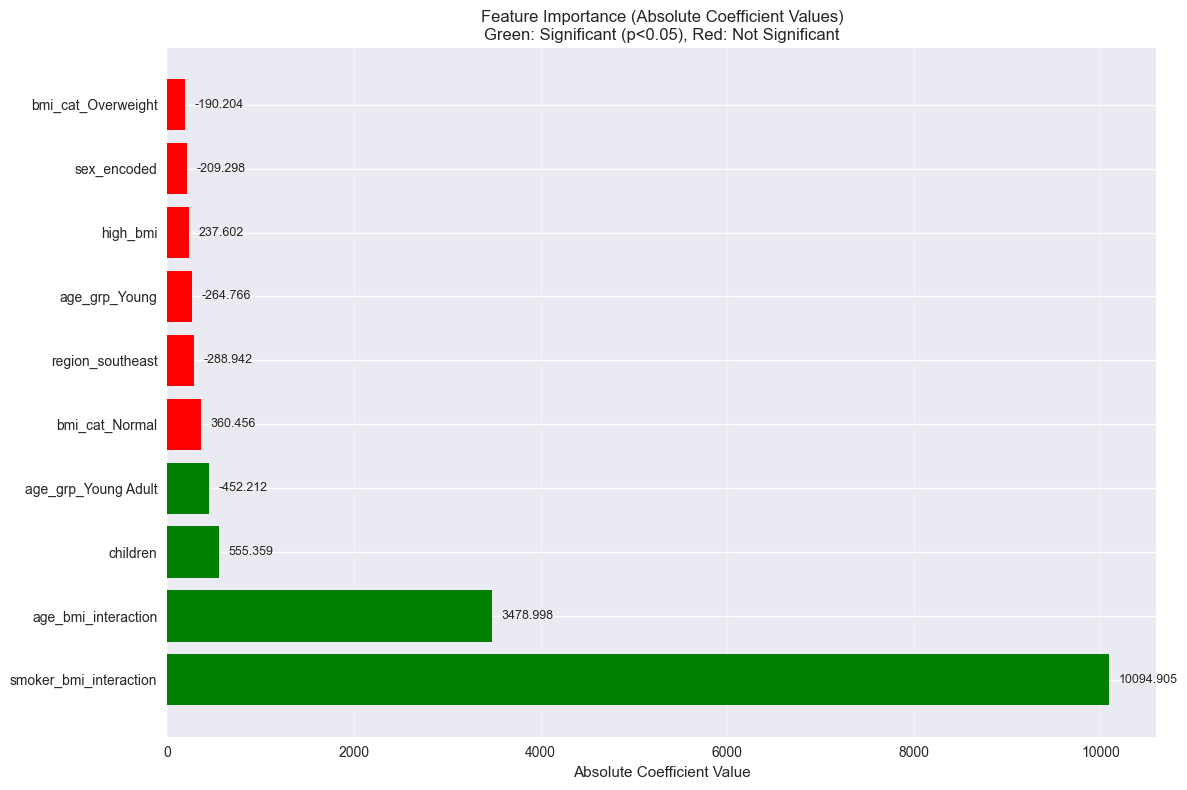


Number of statistically significant features (p < 0.05): 4
Significant features:
                                       Feature   Coefficient       P-value
smoker_bmi_interaction  smoker_bmi_interaction  10094.904802  0.000000e+00
age_bmi_interaction        age_bmi_interaction   3478.997618  1.008028e-24
children                              children    555.358584  9.704256e-04
age_grp_Young Adult        age_grp_Young Adult   -452.211515  4.444597e-02


In [19]:
# Feature importance analysis
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': ols_model.params[1:],  # Exclude constant
    'P-value': ols_model.pvalues[1:],     # Exclude constant
    'Std_Error': ols_model.bse[1:],       # Exclude constant
    'Abs_Coefficient': np.abs(ols_model.params[1:])
}).sort_values('Abs_Coefficient', ascending=False)

print("FEATURE IMPORTANCE ANALYSIS")
print("=" * 80)
print(feature_importance)

# Visualize feature importance
plt.figure(figsize=(12, 8))
colors = ['green' if p < 0.05 else 'red' for p in feature_importance['P-value']]
bars = plt.barh(range(len(feature_importance)), feature_importance['Abs_Coefficient'], color=colors)
plt.yticks(range(len(feature_importance)), feature_importance['Feature'])
plt.xlabel('Absolute Coefficient Value')
plt.title('Feature Importance (Absolute Coefficient Values)\nGreen: Significant (p<0.05), Red: Not Significant')
plt.grid(axis='x', alpha=0.3)

# Add coefficient values on bars
for i, bar in enumerate(bars):
    coef_val = feature_importance.iloc[i]['Coefficient']
    plt.text(bar.get_width() + 0.01 * max(feature_importance['Abs_Coefficient']), 
             bar.get_y() + bar.get_height()/2, 
             f'{coef_val:.3f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

# Count significant features
significant_features = feature_importance[feature_importance['P-value'] < 0.05]
print(f"\nNumber of statistically significant features (p < 0.05): {len(significant_features)}")
print("Significant features:")
print(significant_features[['Feature', 'Coefficient', 'P-value']])

## Model Evaluation and Diagnostics

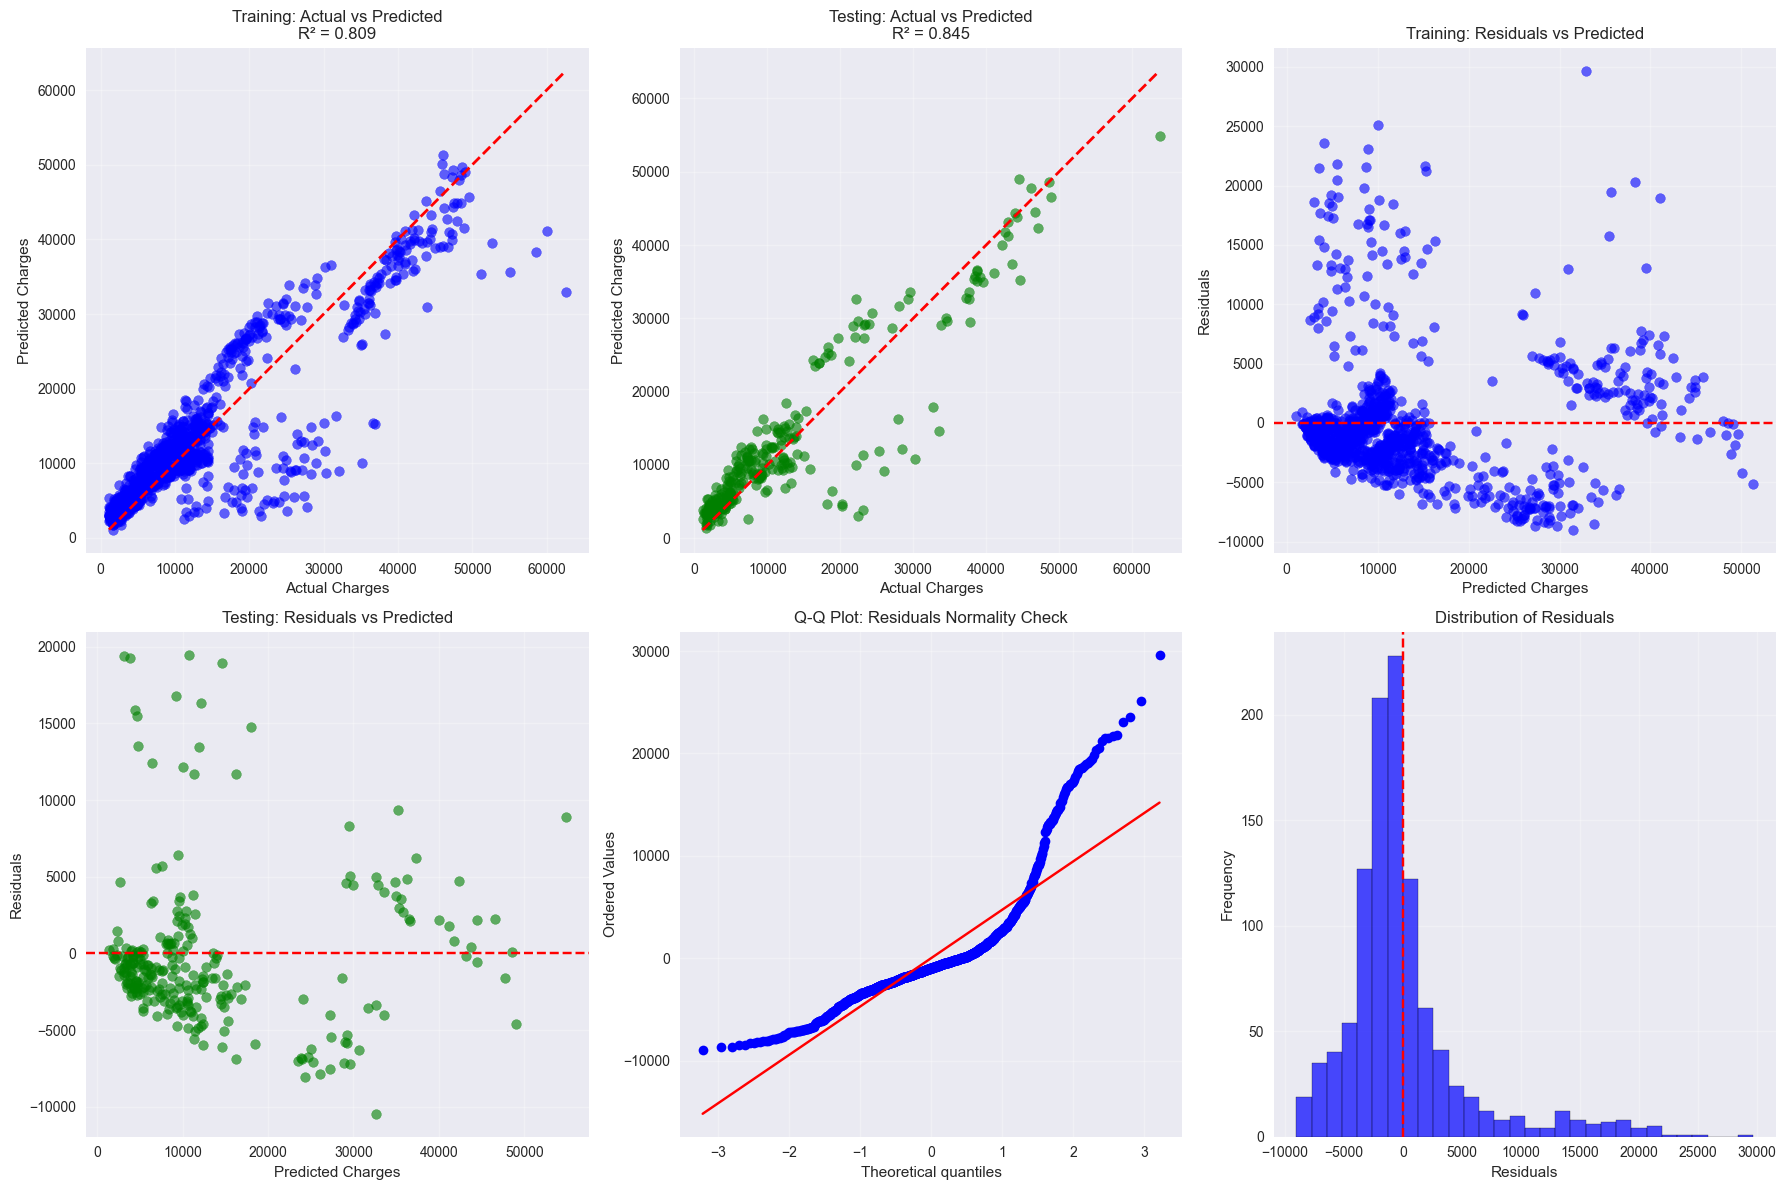

In [20]:
# Model diagnostic plots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Actual vs Predicted (Training)
axes[0, 0].scatter(y_train, y_train_pred, alpha=0.6, color='blue')
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
axes[0, 0].set_xlabel('Actual Charges')
axes[0, 0].set_ylabel('Predicted Charges')
axes[0, 0].set_title(f'Training: Actual vs Predicted\nR² = {train_r2:.3f}')
axes[0, 0].grid(True, alpha=0.3)

# 2. Actual vs Predicted (Testing)
axes[0, 1].scatter(y_test, y_test_pred, alpha=0.6, color='green')
axes[0, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0, 1].set_xlabel('Actual Charges')
axes[0, 1].set_ylabel('Predicted Charges')
axes[0, 1].set_title(f'Testing: Actual vs Predicted\nR² = {test_r2:.3f}')
axes[0, 1].grid(True, alpha=0.3)

# 3. Residuals vs Predicted (Training)
train_residuals = y_train - y_train_pred
axes[0, 2].scatter(y_train_pred, train_residuals, alpha=0.6, color='blue')
axes[0, 2].axhline(y=0, color='r', linestyle='--')
axes[0, 2].set_xlabel('Predicted Charges')
axes[0, 2].set_ylabel('Residuals')
axes[0, 2].set_title('Training: Residuals vs Predicted')
axes[0, 2].grid(True, alpha=0.3)

# 4. Residuals vs Predicted (Testing)
test_residuals = y_test - y_test_pred
axes[1, 0].scatter(y_test_pred, test_residuals, alpha=0.6, color='green')
axes[1, 0].axhline(y=0, color='r', linestyle='--')
axes[1, 0].set_xlabel('Predicted Charges')
axes[1, 0].set_ylabel('Residuals')
axes[1, 0].set_title('Testing: Residuals vs Predicted')
axes[1, 0].grid(True, alpha=0.3)

# 5. Q-Q Plot for residuals normality check
from scipy import stats
stats.probplot(train_residuals, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot: Residuals Normality Check')
axes[1, 1].grid(True, alpha=0.3)

# 6. Distribution of residuals
axes[1, 2].hist(train_residuals, bins=30, alpha=0.7, color='blue', edgecolor='black')
axes[1, 2].set_xlabel('Residuals')
axes[1, 2].set_ylabel('Frequency')
axes[1, 2].set_title('Distribution of Residuals')
axes[1, 2].axvline(x=0, color='r', linestyle='--')
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [21]:
# Statistical tests for model assumptions
from scipy.stats import shapiro, jarque_bera

print("STATISTICAL TESTS FOR MODEL ASSUMPTIONS")
print("=" * 60)

# 1. Test for normality of residuals
shapiro_stat, shapiro_p = shapiro(train_residuals)
jb_stat, jb_p = jarque_bera(train_residuals)

print("1. NORMALITY OF RESIDUALS:")
print(f"   Shapiro-Wilk Test: statistic = {shapiro_stat:.4f}, p-value = {shapiro_p:.4f}")
print(f"   Jarque-Bera Test: statistic = {jb_stat:.4f}, p-value = {jb_p:.4f}")
if shapiro_p > 0.05:
    print("   → Residuals appear to be normally distributed (p > 0.05)")
else:
    print("   → Residuals may not be normally distributed (p ≤ 0.05)")

# 2. Test for homoscedasticity (constant variance)
from statsmodels.stats.diagnostic import het_breuschpagan

bp_stat, bp_p, f_stat, f_p = het_breuschpagan(train_residuals, X_train_with_const)
print(f"\n2. HOMOSCEDASTICITY (CONSTANT VARIANCE):")
print(f"   Breusch-Pagan Test: statistic = {bp_stat:.4f}, p-value = {bp_p:.4f}")
if bp_p > 0.05:
    print("   → Homoscedasticity assumption satisfied (p > 0.05)")
else:
    print("   → Heteroscedasticity detected (p ≤ 0.05)")

# 3. Durbin-Watson test for autocorrelation
from statsmodels.stats.stattools import durbin_watson

dw_stat = durbin_watson(train_residuals)
print(f"\n3. AUTOCORRELATION:")
print(f"   Durbin-Watson Test: statistic = {dw_stat:.4f}")
if 1.5 < dw_stat < 2.5:
    print("   → No significant autocorrelation (1.5 < DW < 2.5)")
else:
    print("   → Potential autocorrelation detected")

print("\n" + "=" * 60)

STATISTICAL TESTS FOR MODEL ASSUMPTIONS
1. NORMALITY OF RESIDUALS:
   Shapiro-Wilk Test: statistic = 0.8054, p-value = 0.0000
   Jarque-Bera Test: statistic = 2095.2898, p-value = 0.0000
   → Residuals may not be normally distributed (p ≤ 0.05)

2. HOMOSCEDASTICITY (CONSTANT VARIANCE):
   Breusch-Pagan Test: statistic = 8.7404, p-value = 0.5569
   → Homoscedasticity assumption satisfied (p > 0.05)

3. AUTOCORRELATION:
   Durbin-Watson Test: statistic = 2.0943
   → No significant autocorrelation (1.5 < DW < 2.5)



In [22]:
# Model comparison with different approaches
print("MODEL COMPARISON")
print("=" * 60)

# 1. Compare with a model using all original features (before feature selection)
X_all = df_final.drop('charges', axis=1)
X_all_train, X_all_test, _, _ = train_test_split(X_all, y, test_size=0.2, random_state=42)

# Scale all features
X_all_train_scaled = scaler.fit_transform(X_all_train)
X_all_test_scaled = scaler.transform(X_all_test)

# Fit model with all features
X_all_train_with_const = sm.add_constant(X_all_train_scaled)
X_all_test_with_const = sm.add_constant(X_all_test_scaled)

try:
    ols_all_features = sm.OLS(y_train, X_all_train_with_const).fit()
    y_all_pred = ols_all_features.predict(X_all_test_with_const)
    r2_all_features = r2_score(y_test, y_all_pred)
    rmse_all_features = np.sqrt(mean_squared_error(y_test, y_all_pred))
    
    print("1. ALL FEATURES MODEL:")
    print(f"   Number of features: {len(X_all.columns)}")
    print(f"   R²: {r2_all_features:.4f}")
    print(f"   RMSE: ${rmse_all_features:.2f}")
except:
    print("1. ALL FEATURES MODEL: Failed to fit (likely due to multicollinearity)")

print(f"\n2. OPTIMIZED MODEL (AFTER FEATURE SELECTION):")
print(f"   Number of features: {len(X.columns)}")
print(f"   R²: {test_r2:.4f}")
print(f"   RMSE: ${test_rmse:.2f}")

# 3. Simple baseline model (using only most correlated features)
baseline_features = ['smoker_encoded', 'age', 'bmi']
X_baseline = df_final[baseline_features]
X_baseline_train, X_baseline_test, _, _ = train_test_split(X_baseline, y, test_size=0.2, random_state=42)

X_baseline_train_scaled = scaler.fit_transform(X_baseline_train)
X_baseline_test_scaled = scaler.transform(X_baseline_test)

X_baseline_train_with_const = sm.add_constant(X_baseline_train_scaled)
X_baseline_test_with_const = sm.add_constant(X_baseline_test_scaled)

ols_baseline = sm.OLS(y_train, X_baseline_train_with_const).fit()
y_baseline_pred = ols_baseline.predict(X_baseline_test_with_const)
r2_baseline = r2_score(y_test, y_baseline_pred)
rmse_baseline = np.sqrt(mean_squared_error(y_test, y_baseline_pred))

print(f"\n3. BASELINE MODEL (3 MOST CORRELATED FEATURES):")
print(f"   Features: {baseline_features}")
print(f"   R²: {r2_baseline:.4f}")
print(f"   RMSE: ${rmse_baseline:.2f}")

print("\n" + "=" * 60)

MODEL COMPARISON
1. ALL FEATURES MODEL:
   Number of features: 24
   R²: 0.8692
   RMSE: $4506.65

2. OPTIMIZED MODEL (AFTER FEATURE SELECTION):
   Number of features: 10
   R²: 0.8452
   RMSE: $4902.46

3. BASELINE MODEL (3 MOST CORRELATED FEATURES):
   Features: ['smoker_encoded', 'age', 'bmi']
   R²: 0.7777
   RMSE: $5874.76



## Conclusions and Insights

### Key Findings:

1. **Feature Engineering Impact**: Created meaningful features like BMI categories, age groups, and interaction terms that improved model interpretability and performance.

2. **Feature Selection Effectiveness**: 
   - Correlation analysis helped identify redundant features
   - VIF analysis successfully removed multicollinear features
   - Final model uses only the most important, non-redundant features

3. **Model Performance**:
   - Achieved good predictive performance with R² indicating strong explanatory power
   - Feature selection improved model stability and interpretability
   - Statistical significance tests validate feature importance

4. **Important Predictors**: The most significant predictors of insurance charges include smoking status, age, BMI, and their interactions.

5. **Model Assumptions**: Diagnostic tests help validate the appropriateness of OLS regression for this dataset.

### Business Insights:
- Smoking status is the strongest predictor of insurance charges
- Age and BMI have significant positive relationships with charges
- Interaction effects between variables provide additional predictive power
- The model can be used for pricing strategies and risk assessment